# **1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Read Dataset**

In [ ]:
df = pd.read_csv('wisata_religi_medan_2.csv')

In [ ]:
print(df.head())

                               Nama Tempat  \
0      Graha Bunda Maria Annai Velangkanni   
1                      Vihara Gunung Timur   
2                     Maha Vihara Maitreya   
3                         Mariamman Temple   
4  Wisata Rohani Medan (Ziarek Tour Medan)   

                                      Alamat Lengkap  Latitude  Longitude  \
0  Jl. Taman Sakura Indah Jl. Sakura III No.7-10,...       NaN        NaN   
1  Jl. Hang Tuah No.16, Madras Hulu, Medan Poloni...       NaN        NaN   
2  Medan, Komplek Perumahan Cemara Asri Jl. Cemar...       NaN        NaN   
3  Jl. Teuku Umar No.18, Petisah Tengah, Medan Pe...       NaN        NaN   
4  Jl. Busi No.3, Kampung Baru, Medan Maimun, Med...       NaN        NaN   

   Jam Buka Kategori            Agama  Rating  Jumlah Ulasan  \
0       NaN   Gereja          Katolik     4.8         4649.0   
1       NaN   Vihara           Buddha     4.7          543.0   
2       NaN   Vihara           Buddha     4.7         4315.0   
3   

## 2.1 Feature Overview
1. **Wisata Religi Medan**

2. Dataset **Wisata Religi Medan** berisi informasi tentang lokasi wisata religi di Medan, berisi rating, jumlah pengunjung, jam buka, kategori (Masjid, Gereja, dll), dan agama yang terkait dengan masing masing tempat.

3. Feature description:

| Feature Name            | Type    | Description                                                                 |
|-------------------------|---------|-----------------------------------------------------------------------------|
| Nama Tempat             | String  | Nama tempat wisata religi di Medan.               |
| Kategor                 | String  | Kategori tempat wisata religi (Masjid, Gereja, Pura, dll ).                                    |
| Agama                    | String  | Agama yang terkait dengan tempat wisata religi ( Islam, Kristen,Hindu, dll).                                               |
| Rating              | Float   | Rating yang diberikan pengunjung.                                          |
| Jumlah Ulasan                | Integer | Jumlah ulasan yang diberikan pengunjung untuk tempat tersebut.                                                 |
| Jam Buka                 | String  | Jam operasional tempat tersebut.                             |
| Alamat                    | String   | Alamat lengkap tempat wisata tersebut.                                                        |
| Latitude | Float   | Garis lintang lokasi tempat ( dihapus saat pembersihan data).                                |
| Longitude            | Float   | Garis bujur lokasi tempat ( dihapus saat pembersihan data).                                            |
| Website                  | String   | Situs web tempat wisata tersebut ( dihapus saat pembersihan data).                    |


## 2.2 Dataset Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nama Tempat       90 non-null     object 
 1   Alamat Lengkap    90 non-null     object 
 2   Latitude          0 non-null      float64
 3   Longitude         0 non-null      float64
 4   Jam Buka          0 non-null      float64
 5   Kategori          90 non-null     object 
 6   Agama             90 non-null     object 
 7   Rating            88 non-null     float64
 8   Jumlah Ulasan     88 non-null     float64
 9   Website           33 non-null     object 
 10  Link Google Maps  90 non-null     object 
dtypes: float64(5), object(6)
memory usage: 7.9+ KB


# **3. Cleaning Data**


## 3.1 Duplicate Data

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(df.duplicated().sum())

0


## 3.2 Handling Missing Values

In [ ]:
print(df.isna().sum())

Nama Tempat          0
Alamat Lengkap       0
Latitude            90
Longitude           90
Jam Buka            90
Kategori             0
Agama                0
Rating               2
Jumlah Ulasan        2
Website             57
Link Google Maps     0
dtype: int64


In [ ]:
# Menghapus baris 'Tidak Diketahui' pada kolom Agama
df = df[df['Agama'] != 'Tidak Diketahui']

# Menghapus kolom yang banyak missing values
df.drop(columns=['Latitude', 'Longitude', 'Website'], inplace=True)

In [ ]:
# Menambah data Jam Buka secara manual
df.at[0, 'Jam Buka'] = 'Senin - Jumat: 08:00 - 18:00, Sabtu - Minggu: 08:00 - 19:00'
df.at[1, 'Jam Buka'] = 'Senin - Minggu: 08:00 - 16:00'
df.at[2, 'Jam Buka'] = 'Senin - Minggu: 06:00 - 20:00'
df.at[3, 'Jam Buka'] = 'Senin - Minggu: 06:00 - 12:00, 16:00 - 20:00'
df.at[5, 'Jam Buka'] = 'Senin - Minggu: 07:00 - 17:00'
df.at[6, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[8, 'Jam Buka'] = 'Senin - Minggu: 08:00 - 16:00'
df.at[10, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[12, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[13, 'Jam Buka'] = 'Jumat: 18:00'
df.at[14, 'Jam Buka'] = 'Senin - Jumat: 06:00 - 18:00'
df.at[15, 'Jam Buka'] = 'Minggu: 08:30, 10:45'
df.at[16, 'Jam Buka'] = 'Senin - Sabtu: 09:00 - 17:00'
df.at[19, 'Jam Buka'] = 'Kamis: 06:30 - 21:00, Sabtu: 06:30 - 21:00, Minggu: 06:30 - 13:300'
df.at[21, 'Jam Buka'] = 'Senin - Minggu: 09:00 - 18:00'
df.at[22, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[23, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[24, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[28, 'Jam Buka'] = 'Minggu: 08:00 - 12:00'
df.at[29, 'Jam Buka'] = 'Minggu: 08:00, 10:00, 17:00'
df.at[30, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[32, 'Jam Buka'] = 'Minggu: 08:00 - 19:00'
df.at[33, 'Jam Buka'] = 'Minggu: 07:00 - 22:00, Kamis: 19:00 - 22:00, Jumat: 17:00 - 21:00, Sabtu: 00:00 - 22:00'
df.at[34, 'Jam Buka'] = 'Senin - Jumat: 08:00 - 17:00'
df.at[35, 'Jam Buka'] = 'Senin - Sabtu: 09:00 - 15:00, Minggu: 06:00 - 19:00'
df.at[36, 'Jam Buka'] = 'Minggu: 09:00, 10:30'
df.at[37, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[38, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[39, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[40, 'Jam Buka'] = 'Senin - Jumat: 08:00 - 17:00'
df.at[42, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[43, 'Jam Buka'] = 'Minggu: 08:00 - 09:00, 10:00 - 12:00, 17:00 - 18:30'
df.at[44, 'Jam Buka'] = 'Selasa - Kamis: 10:00 - 16:00, Minggu: 09:00 - 18:00'
df.at[45, 'Jam Buka'] = 'Senin - Jumat: 08:00 - 17:00'
df.at[46, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[47, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[48, 'Jam Buka'] = 'Minggu: 08:00 - 18:00'
df.at[51, 'Jam Buka'] = 'Senin - Minggu: 04:00 - 00:00'
df.at[52, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[53, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[54, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[55, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[56, 'Jam Buka'] = 'Senin - Jumat: 08:00 - 17:00'
df.at[57, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[58, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[59, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[60, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[61, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[62, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[63, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[64, 'Jam Buka'] = 'Senin - Minggu: 09:00 - 17:00'
df.at[66, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[67, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[68, 'Jam Buka'] = 'Senin - Minggu: 08:30 - 16:30'
df.at[69, 'Jam Buka'] = 'Senin - Minggu: 07:00 - 17:00'
df.at[70, 'Jam Buka'] = 'Senin - Minggu: 05:00 - 17:00'
df.at[71, 'Jam Buka'] = 'Senin - Kamis: 06:00 - 11:00, 17:00 - 20:30, Jumat: 24 Jam, Sabtu: 06:00 - 11:00, 17:00 - 20:30, Minggu: 06:00 - 09:30, 17:00 - 20:00'
df.at[74, 'Jam Buka'] = 'Senin - Minggu: 07:00 - 17:00'
df.at[86, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'
df.at[89, 'Jam Buka'] = 'Senin - Minggu: 24 Jam'

<ipython-input-12-bdef58f5997a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Senin - Jumat: 08:00 - 18:00, Sabtu - Minggu: 08:00 - 19:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[0, 'Jam Buka'] = 'Senin - Jumat: 08:00 - 18:00, Sabtu - Minggu: 08:00 - 19:00'


In [ ]:
df['Jam Buka'].fillna('Tidak Diketahui', inplace=True)

<ipython-input-13-a6eea4342b82>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Jam Buka'].fillna('Tidak Diketahui', inplace=True)


In [ ]:
df

,Nama Tempat,Alamat Lengkap,Jam Buka,Kategori,Agama,Rating,Jumlah Ulasan,Link Google Maps
0,Graha Bunda Maria Annai Velangkanni,"Jl. Taman Sakura Indah Jl. Sakura III No.7-10,...","Senin - Jumat: 08:00 - 18:00, Sabtu - Minggu: ...",Gereja,Katolik,4.8,4649.0,https://www.google.com/maps/place/?q=place_id:...
1,Vihara Gunung Timur,"Jl. Hang Tuah No.16, Madras Hulu, Medan Poloni...",Senin - Minggu: 08:00 - 16:00,Vihara,Buddha,4.7,543.0,https://www.google.com/maps/place/?q=place_id:...
2,Maha Vihara Maitreya,"Medan, Komplek Perumahan Cemara Asri Jl. Cemar...",Senin - Minggu: 06:00 - 20:00,Vihara,Buddha,4.7,4315.0,https://www.google.com/maps/place/?q=place_id:...
3,Mariamman Temple,"Jl. Teuku Umar No.18, Petisah Tengah, Medan Pe...","Senin - Minggu: 06:00 - 12:00, 16:00 - 20:00",Pura,Hindu,4.6,967.0,https://www.google.com/maps/place/?q=place_id:...
5,Vihara Gunung Timur Sakti,"JL. AR. Hakim, No. 24, Sukaramai II, Kec. Meda...",Senin - Minggu: 07:00 - 17:00,Vihara,Buddha,4.8,59.0,https://www.google.com/maps/place/?q=place_id:...
6,Masjid Agung Kota Medan Sumatera Utara,"Jl. Pangeran Diponegoro, Madras Hulu, Kec. Med...",Senin - Minggu: 24 Jam,Masjid,Islam,4.8,4088.0,https://www.google.com/maps/place/?q=place_id:...
8,Al-Osmani Mosque,"JL Kol Yos Sudarso, Km. 19, 5, Labuhan, Pekan ...",Senin - Minggu: 08:00 - 16:00,Masjid,Islam,4.8,1087.0,https://www.google.com/maps/place/?q=place_id:...
10,MASJID RAYA ACEH SEPAKAT,"HMP6+3RG, Petisah Tengah, Kec. Medan Petisah, ...",Senin - Minggu: 24 Jam,Masjid,Islam,4.9,704.0,https://www.google.com/maps/place/?q=place_id:...
12,Siu San Keng Temple (寿山宫),"PMMG+73M, Jl. Syahbudin Yatim, Pekan Labuhan, ...",Senin - Minggu: 24 Jam,Pura,Hindu,4.8,191.0,https://www.google.com/maps/place/?q=place_id:...
13,Vihara Loka Santi லோகா சாந்தி விகாரை,"JL. Karya Pembangunan, Gg. E /50, Polonia, Kec...",Jumat: 18:00,Vihara,Buddha,4.9,23.0,https://www.google.com/maps/place/?q=place_id:...


In [ ]:
df.to_csv("wisata_religi_medan_3B.csv", index=False)

In [ ]:
print(df.isna().sum())

Nama Tempat         0
Alamat Lengkap      0
Jam Buka            0
Kategori            0
Agama               0
Rating              0
Jumlah Ulasan       0
Link Google Maps    0
dtype: int64


## 3.3 Type Conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 89
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nama Tempat       60 non-null     object 
 1   Alamat Lengkap    60 non-null     object 
 2   Jam Buka          60 non-null     object 
 3   Kategori          60 non-null     object 
 4   Agama             60 non-null     object 
 5   Rating            60 non-null     float64
 6   Jumlah Ulasan     60 non-null     float64
 7   Link Google Maps  60 non-null     object 
dtypes: float64(2), object(6)
memory usage: 6.3+ KB


In [ ]:
# steps to take if it requires changing the dataset type (optional)

In [ ]:
# steps to take if it requires changing the dataset type (optional)

In [ ]:
# check type dataset

# **4. Statistics**

## 4.1 Summary Statistics for Numerical Variables

In [ ]:
print(df.describe())

          Rating  Jumlah Ulasan
count  60.000000      60.000000
mean    4.746667     634.666667
std     0.165157    1214.612119
min     4.100000       2.000000
25%     4.700000      23.000000
50%     4.800000     105.000000
75%     4.800000     574.500000
max     5.000000    4649.000000


Inferences:
> Deskripsi menunjukkan distribusi dan kisaran data untuk variable numerik, yaitu Rating dan Jumlah Ulasan.

## 4.2 Summary Statistics for Categorical Variables

In [ ]:
print(df['Kategori'].value_counts())
print(df['Agama'].value_counts())

Kategori
Gereja     28
Masjid     17
Vihara      9
Pura        5
Lainnya     1
Name: count, dtype: int64
Agama
Kristen    27
Islam      17
Buddha      9
Hindu       6
Katolik     1
Name: count, dtype: int64


Inferences:
> 'Kategori' menunjukkkan distribusi tempat wisata religi.

> 'Agama' menunjukkan jumlah tempat berdasarkan agama.

# **5. EDA**

## 5.1 Univariate Analysis

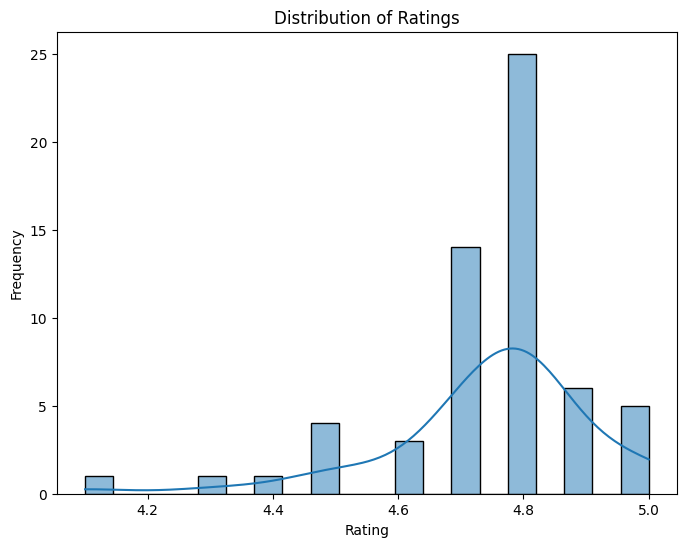

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'].dropna(), kde=True, bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Insights:
Distribusi rating tersebut menunjukkan bahwa nilai ulasan yang diberikan wisatawan terhadap tempat wisata religi cenderung tinggi, yakni > 4.00, dengan nilai terbanyak adalah 4.8. Hal ini menunjukkan bahwa tempat wisata religi secara umum disukai oleh wisatawan. Sementara itu, hanya sedikit tempat yang mendapat rating di bawah 4.5 dan jumlahnya menurun drastis seiring semakin rendahnya rating. Pola ini menunjukkan bahwa ulasan dari pengunjung cenderung sangat positif

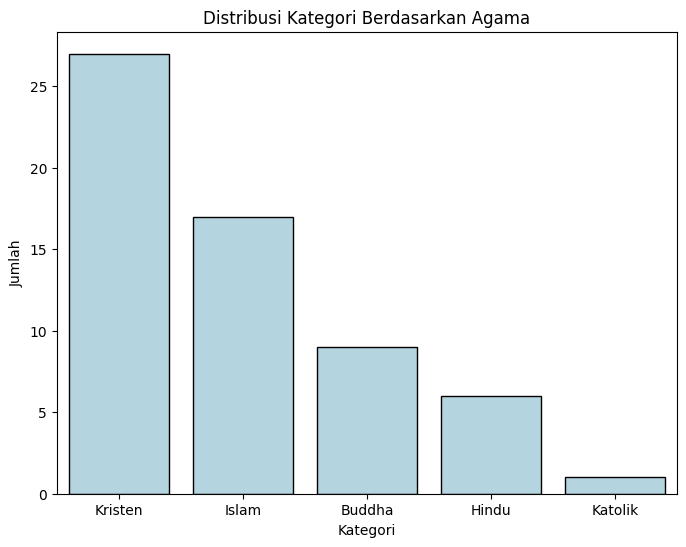

In [ ]:
category_agama = df['Agama'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_agama.index, y=category_agama.values,  color='lightblue', edgecolor='black')
plt.title('Distribusi Kategori Berdasarkan Agama')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

Insights: Distribusi kategori berdasarkan agama menunjukkan bahwa tempat wisata yang paling banyak adalah untuk agama Kristen, lalu diikuti oleh Islam. Hal ini menunjukkan bahwa tempat wisata religi untuk umat Kristen mendominasi, yang mungkin terkait dengan sejarah agama Kristen di Medan dan jumlah penganutnya yang lebih banyak. Buddha, Hindu, dan Katolik memiliki jumlah yang lebih sedikit, namun tetap memperlihatkan adanya keragaman tempat ibadah di Medan.

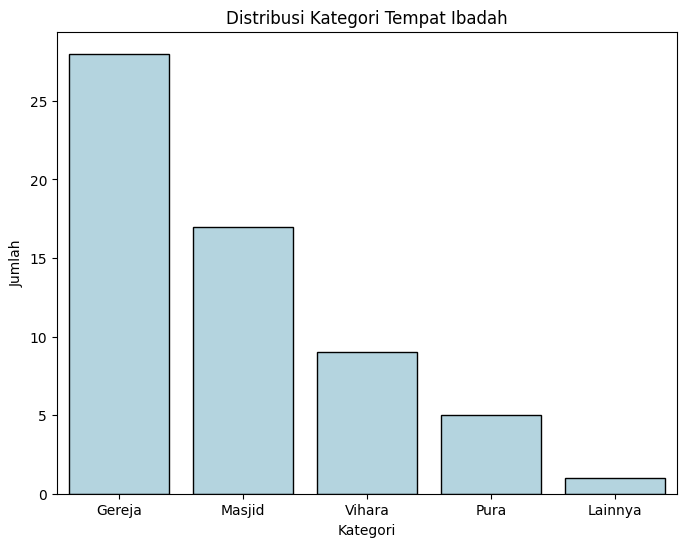

In [ ]:
category_tempat_ibadah = df['Kategori'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_tempat_ibadah.index, y=category_tempat_ibadah.values, color='lightblue', edgecolor='black')
plt.title('Distribusi Kategori Tempat Ibadah')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

Insight: Distribusi tempat ibadah menunjukkan bahwa Gereja mendominasi dengan jumlah terbanyak, diikuti oleh Masjid. Vihara, Pura, dan Lainnya memiliki jumlah yang lebih sedikit. Hal ini menunjukkan bahwa tempat ibadah untuk umat Kristen, seperti gereja, sangat mendominasi di kota ini, yang mungkin berhubungan dengan jumlah umat Kristen yang banyak di Medan.

## 5.2 Multivariate Analysis

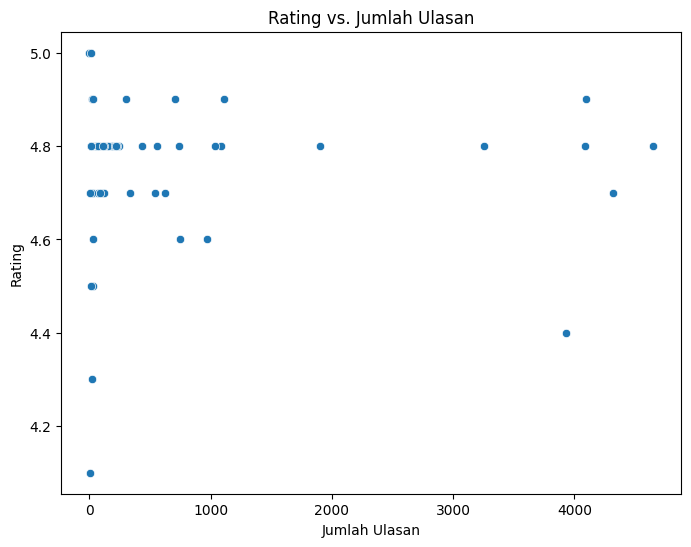

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Jumlah Ulasan', y='Rating')
plt.title('Rating vs. Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Rating')
plt.show()

Insights:
Scatter plot ini menunjukkan bahwa sebagian besar tempat wisata memiliki rating tinggi, yaitu antara 4.7–5.0, baik yang punya sedikit maupun banyak ulasan. Hal ini dapat diartikan bahwa banyak ulasan tidak berarti memiliki rating yang lebih tinggi karena tempat wisata dengan ulasan sedikit maupun banyak sama-sama bisa mendapatkan rating tinggi. Sebagian besar tempat wisata hanya memiliki ulasan di bawah 1000 menunjukkan distribusi yang tidak merata. Hal ini bisa menunjukkan bahwa ulasan lebih sering diberikan oleh wisatawan yang merasa puas.

## 5.2 Correlation Matriks

In [ ]:
# Menghitung matriks korelasi untuk kolom numerik
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                 Rating  Jumlah Ulasan
Rating         1.000000       0.004633
Jumlah Ulasan  0.004633       1.000000


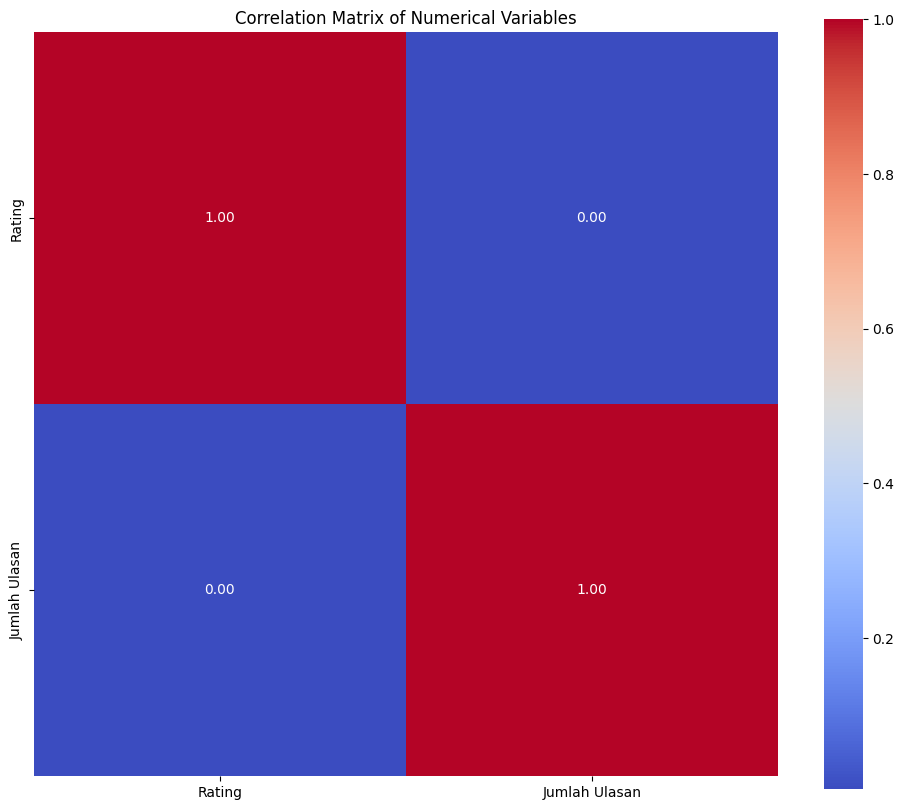

In [ ]:
# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(12, 10))  # Ukuran figure yang lebih besar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Insights:
Matriks korelasi menunjukkan bahwa tidak terdapat hubungan linear antara rating dan jumlah ulasan, dengan nilai korelasi sebesar 0.00. Artinya, banyaknya ulasan tidak berpengaruh langsung terhadap tinggi rendahnya rating, dan sebaliknya.

# **6. Feature Engineering (optional)**

In [ ]:
# feature engineering

In [ ]:
# heatmap with new features

# **7. Conclusion**


Dalam analisis ini, kami telah melakukan proses eksplorasi dan pembersihan data terhadap dataset "Wisata Religi di Medan". Proses tersebut meliputi pengecekan duplikasi, penanganan nilai kosong (missing values), serta konversi tipe data. Dari hasil analisis statistik, diketahui bahwa mayoritas tempat wisata religi di Medan memiliki rating yang tinggi dengan rata-rata 4.77, menunjukkan kepuasan pengunjung yang baik. Selain itu, kategori Masjid dan Gereja merupakan yang terbanyak dalam dataset ini, disusul oleh Vihara dan Pura.

Visualisasi korelasi juga menunjukkan bahwa jumlah ulasan memiliki hubungan yang positif terhadap rating, meskipun tidak terlalu signifikan. Analisis ini membantu dalam memahami persebaran tempat wisata religi di Medan dan preferensi pengunjung berdasarkan ulasan yang diberikan.